In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visadata=pd.read_csv("/Users/shashankreddy/Desktop/Datafiles/Visadataset - Visadataset.csv")

In [3]:
visadata.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# box plot

- Box plot has min q1 q2 q3 max values

-inside box plot red line represents median which is 50 percentile

- Mild Outliers

- q1-1.5IQR  and q3+1.5IQR

- strong outliers

- q1-3.0*IQR and q3+3*IQR

- iQR=q3-q1

- q1=25p

- q2=50p

- q3=75p

{'whiskers': [<matplotlib.lines.Line2D at 0x168b38e50>,
 'caps': [<matplotlib.lines.Line2D at 0x168b60c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x168b2e410>],
 'medians': [<matplotlib.lines.Line2D at 0x168b88bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168bb2550>],
 'means': []}

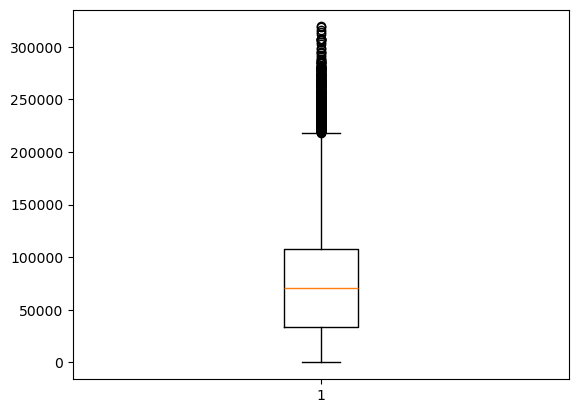

In [4]:
plt.boxplot(visadata["prevailing_wage"])

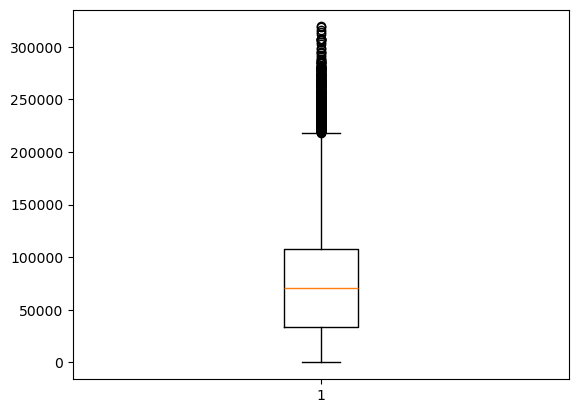

In [7]:
plt.boxplot(visadata["prevailing_wage"])
plt.show()

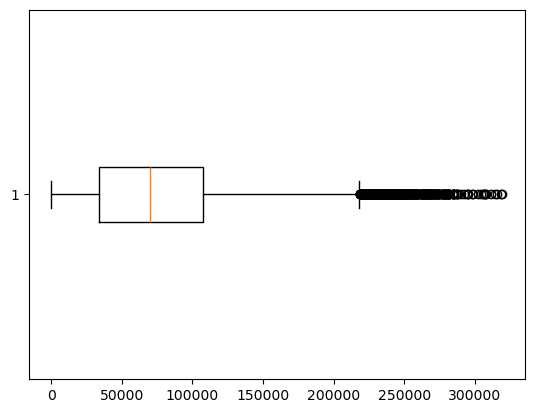

In [8]:
#to change plot to horizental we need to use vert proeprty 
plt.boxplot(visadata["prevailing_wage"],vert=False)
plt.show()

<Axes: >

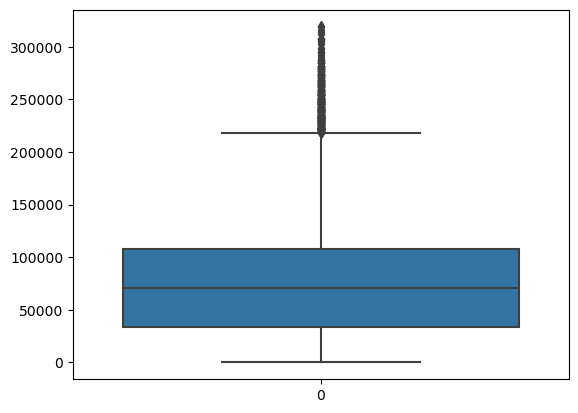

In [10]:
#by using seaborn
sns.boxplot(visadata["prevailing_wage"])

<Axes: >

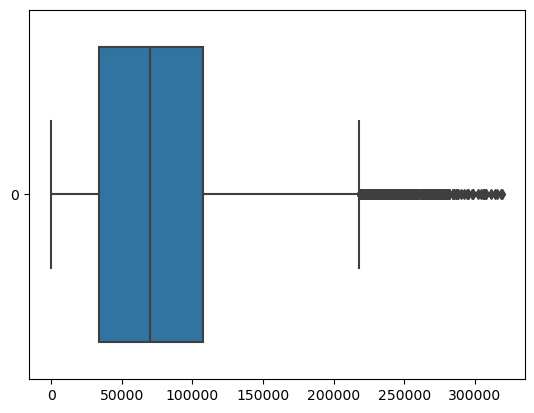

In [11]:
sns.boxplot(visadata["prevailing_wage"],orient='h')

{'whiskers': [<matplotlib.lines.Line2D at 0x151522890>,
 'caps': [<matplotlib.lines.Line2D at 0x151528950>,
 'boxes': [<matplotlib.lines.Line2D at 0x151521bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x15152a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x15152bbd0>],
 'means': []}

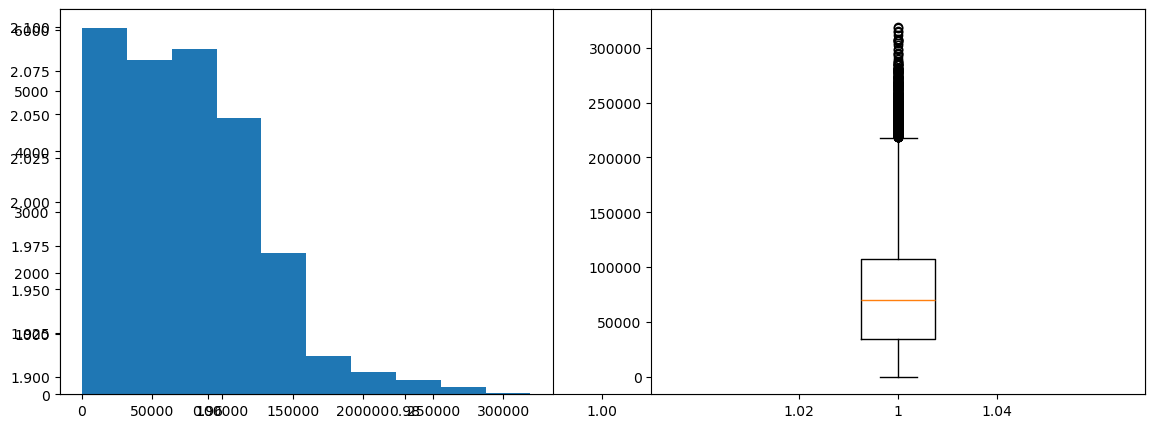

In [14]:
plt.figure(figsize=(14,5))
plt.plot(1,2)
plt.subplot(1,2,1).hist(visadata["prevailing_wage"])
plt.subplot(1,2,2).boxplot(visadata["prevailing_wage"])

In [15]:
#outlier analyiss

In [16]:
# find number of outliers

#we need use percentiles not quantiles

In [17]:
mean=round(visadata["prevailing_wage"].mean(),2)

In [18]:
mean

74455.81

In [19]:
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)

In [20]:
iqr=q3-q1

In [21]:
lowerboundary=q1-1.5*(iqr)

In [23]:
lowerboundary

-76564.565

In [22]:
upperboundary=q3+1.5*(iqr)

In [24]:
upperboundary

218315.555

In [25]:
con1=visadata["prevailing_wage"]<lowerboundary

In [26]:
con1

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [27]:
con2=visadata["prevailing_wage"]>upperboundary

In [28]:
con2

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [34]:
outliersdata=visadata[con1 | con2]

In [35]:
outliersdata

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [36]:
len(outliersdata)

427

In [40]:
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lowerboundary=q1-1.5*(iqr)
upperboundary=q3+1.5*(iqr)
con1=visadata["prevailing_wage"]<lowerboundary
con2=visadata["prevailing_wage"]>upperboundary
outliersdata=visadata[con1 | con2]
outliersdata

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


# Non outliers data

In [44]:
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lowerboundary=q1-1.5*(iqr)
upperboundary=q3+1.5*(iqr)
con1=visadata["prevailing_wage"]>lowerboundary
con2=visadata["prevailing_wage"]<upperboundary
nonoutliersdata=visadata[con1 & con2]
nonoutliersdata

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [46]:
#histogram and boxplot for nonoutliers data

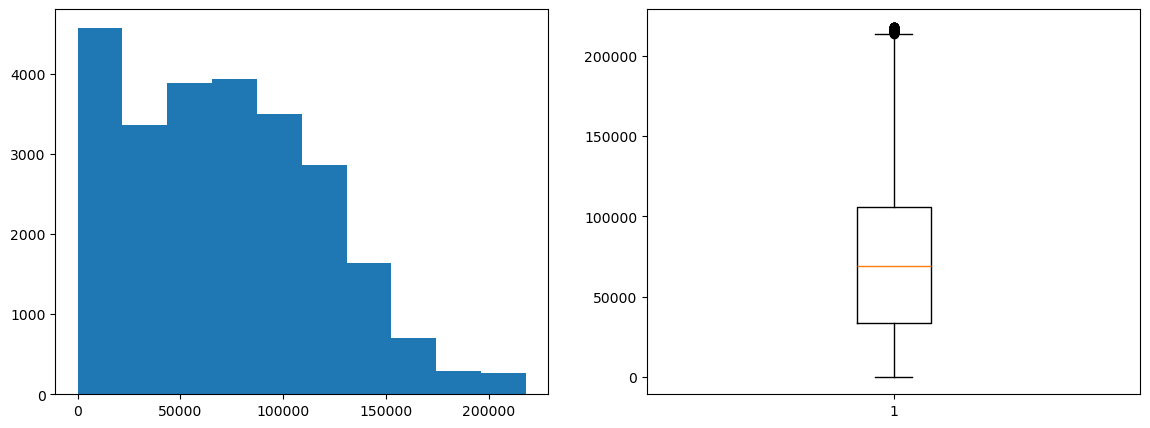

In [45]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(nonoutliersdata['prevailing_wage'])
plt.subplot(1,2,2).boxplot(nonoutliersdata['prevailing_wage'])
plt.show()

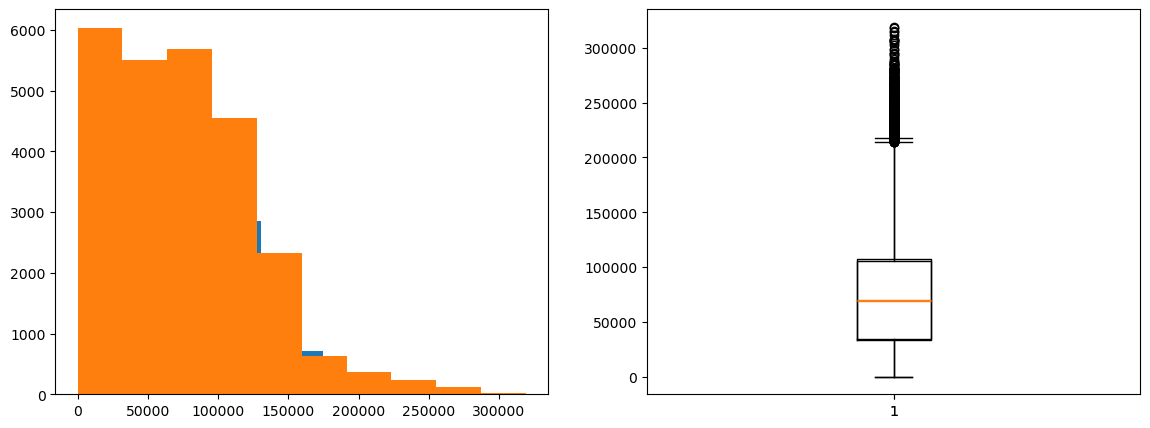

In [47]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(nonoutliersdata['prevailing_wage'])
plt.subplot(1,2,1).hist(visadata['prevailing_wage'])
plt.subplot(1,2,2).boxplot(nonoutliersdata['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visadata['prevailing_wage'])
plt.show()

In [ ]:
# coparing total data with nonoutliers data

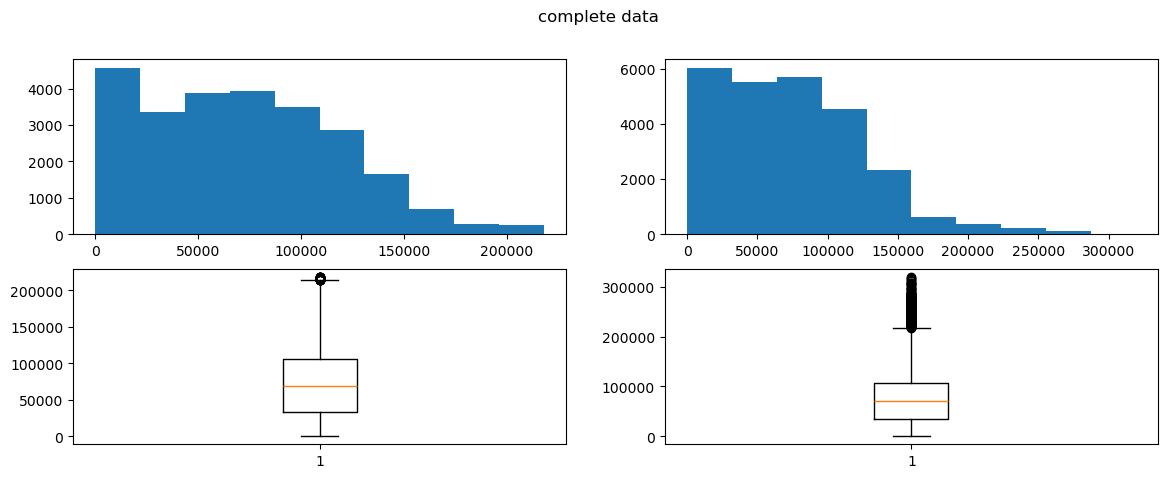

In [49]:
plt.figure(figsize=(14,5))
plt.suptitle("non -outliers data")
plt.subplot(2,2,1).hist(nonoutliersdata['prevailing_wage'])
plt.subplot(2,2,2).hist(visadata['prevailing_wage'])
plt.suptitle("complete data")
plt.subplot(2,2,3).boxplot(nonoutliersdata['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visadata['prevailing_wage'])
plt.show()

In [50]:
# removing outliers doesnt mean the data will follow normal distribution

# How to deal with outliers

In [51]:
#method 1 drop the outliers

Method-1: Drop the ouliers
- Drop the ouliers is not a good idea
  
- When you drop the ouliers , data will loss
- For example here we are droping 427 rows
- x% of 25480=427
- it is 1.7% data, here it is fine we can drop the outlier


- Method-2: Fill with median value 
- we already know that outliers does not affect the median
- so we can fill outliers by median


-  Method-3: Cap the values with Q1 and Q3


- all Lesthan lower bound values, we can replace with q1 or LB
- all gretaer than upper bound values , we can replace with q3 or UB




- Fill with median
- create a empty list
- calculate median value: visadata['prevailing_wage'].median
- iterate through visadata['prevailing_wage'].values
- if each value is < lb or >ub  then replace with median values
- else append with i value

In [62]:
l1=[]
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)
medianvalue=visadata['prevailing_wage'].median()
for i in visadata['prevailing_wage'].values:
    if i >ub or i<lb:
        l1.append(medianvalue)
    else:
        l1.append(i)
        

In [63]:
visadatacopy=visadata.copy()

In [64]:
visadatacopy["prevailing_wage"]=l1

{'whiskers': [<matplotlib.lines.Line2D at 0x29da26f90>,
 'caps': [<matplotlib.lines.Line2D at 0x29da30190>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d8e2a10>],
 'medians': [<matplotlib.lines.Line2D at 0x29da31190>],
 'fliers': [<matplotlib.lines.Line2D at 0x29da319d0>],
 'means': []}

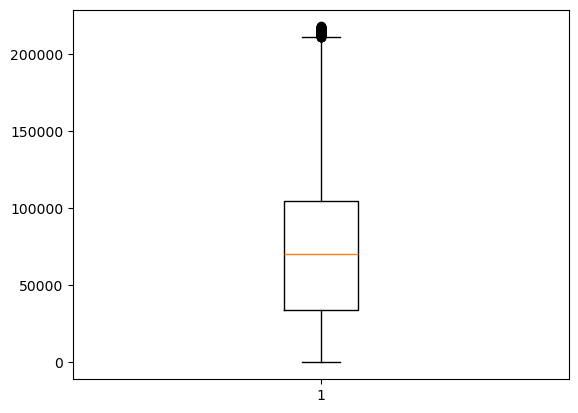

In [65]:
plt.boxplot(visadatacopy["prevailing_wage"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29d89ff50>,
 'caps': [<matplotlib.lines.Line2D at 0x29d36e4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d3589d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29d33b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d33ac90>],
 'means': []}

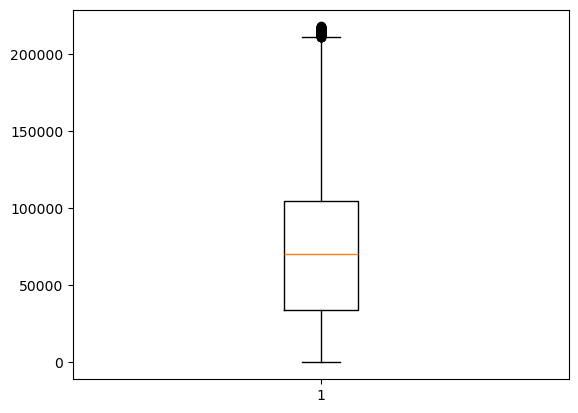

In [61]:
l1=[]
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)
medianvalue=visadata['prevailing_wage'].median()
for i in visadata['prevailing_wage'].values:
    if i >ub or i<lb:
        l1.append(medianvalue)
    else:
        l1.append(i)
visadatacopy=visadata.copy()
visadatacopy["prevailing_wage"]=l1
plt.boxplot(visadatacopy["prevailing_wage"])

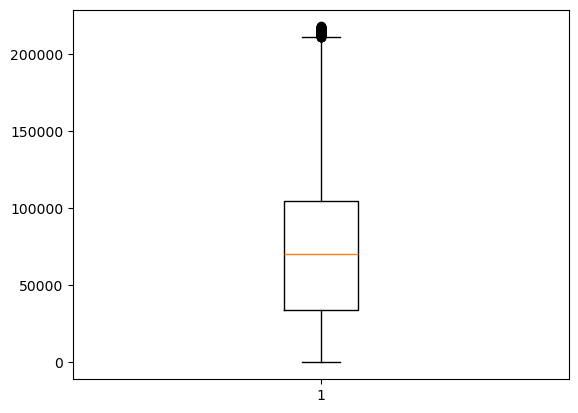

In [66]:
l1=[]
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)
medianvalue=visadata['prevailing_wage'].median()
for i in visadata['prevailing_wage'].values:
    if i >ub or i<lb:
        l1.append(medianvalue)
    else:
        l1.append(i)
visadatacopy=visadata.copy()
visadatacopy["prevailing_wage"]=l1
plt.boxplot(visadatacopy["prevailing_wage"])
plt.show()

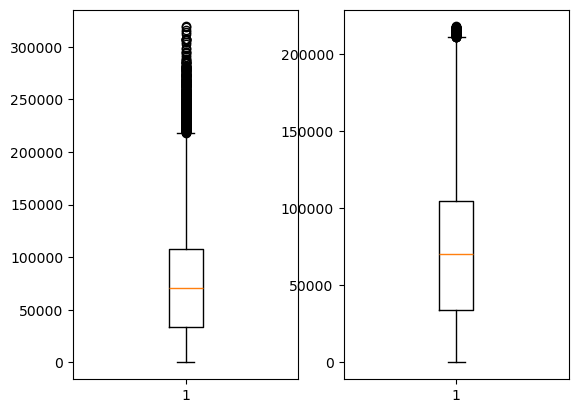

In [67]:
l1=[]
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
iqr=q3-q1
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)
medianvalue=visadata['prevailing_wage'].median()
for i in visadata['prevailing_wage'].values:
    if i >ub or i<lb:
        l1.append(medianvalue)
    else:
        l1.append(i)
visadatacopy=visadata.copy()
visadatacopy["prevailing_wage"]=l1
plt.subplot(1,2,1).boxplot(visadata["prevailing_wage"])
plt.subplot(1,2,2).boxplot(visadatacopy["prevailing_wage"])
plt.show()

# np.where

- np.where will use for binary condition

-it has 3 Arguments

    -condition

    -value if condition is True 

    -Another value if condition is False

In [70]:
d={"sub":["ds","ml","cs"],
  "marks":[100,150,200]
  }
data=pd.DataFrame(d)

#replace marks column with 1 if marks are greater than 100

In [72]:
data["marks"]

0    100
1    150
2    200
Name: marks, dtype: int64

In [73]:
con=data["marks"]>100
l=np.where(con,1,data["marks"])

In [74]:
l

array([100,   1,   1])

In [76]:
q1=round(np.percentile(visadata['prevailing_wage'],25),2)
q2=round(np.percentile(visadata['prevailing_wage'],50),2)
q3=round(np.percentile(visadata['prevailing_wage'],75),2)
medianvalue=visadata['prevailing_wage'].median()
iqr=q3-q1
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)
con1=visadata["prevailing_wage"]<lb
con1=visadata["prevailing_wage"]>ub
con=con1 | con2
l2=np.where(con,medianvalue,visadata["prevailing_wage"])